Question-1

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [222]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
y = data.iloc[:, -1]
X = np.array(data['Age']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [223]:
def sigma(z):
    h = 1 / (1 + np.exp(-z))
    return h

def L(y, h):
    loss = -(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

In [224]:
def GD(X, h, y):
    dw = (1 / len(y)) * np.dot(X.T, (h - y))
    db = (1 / len(y)) * np.sum(h - y)
    return dw, db

In [225]:
def fit(X, y, learning_rate=0.01, num_iterations=1000):
    num_samples, num_features = X.shape
    weights, bias = np.zeros(num_features), 0

    for i in range(num_iterations):
        linear_model = np.dot(X, weights) + bias
        predictions = sigma(linear_model)

        cost = L(y, predictions)

        dw, db = GD(X, predictions, y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


In [226]:
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    predicted_probabilities = sigma(linear_model)
    for prob in predicted_probabilities:
      if prob>=0.5:
        predicted_labels=1
      else:
        predicted_labels=0
    return predicted_labels

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [227]:
# Train the logistic regression model
learned_weights, learned_bias = fit(X_train, y_train, learning_rate=0.1)

# Make predictions on the test set
y_pred = predict(X_test, learned_weights, learned_bias)

# Calculate the accuracy of the model
acc = accuracy(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {acc * 100}")


<ipython-input-223-7076922686ee>:6: RuntimeWarning: divide by zero encountered in log
  loss = -(y * np.log(h) + (1 - y) * np.log(1 - h))


Accuracy of the logistic regression model: 65.83333333333333


In [228]:
from sklearn.linear_model import LogisticRegression
LRG = LogisticRegression(random_state=0)
LRG.fit(X_train, y_train)
y_pred=LRG.predict(X_test)
acc = accuracy(y_test, y_pred)
print(f"Accuracy of the logistic regression model from sklearn: {acc * 100}")

Accuracy of the logistic regression model from sklearn: 86.66666666666667


In [229]:
LRG.score(X_test,y_test)*100

86.66666666666667

In [230]:
def normalization(D):
  Dmax=pd.DataFrame(D).idxmax()
  Dmin=pd.DataFrame(D).idxmin()
  d_min=np.array(Dmin)
  d_max=np.array(Dmax)
  D_n=(D-d_min)/(d_max-d_min)
  return D_n


In [231]:
X_train_n= normalization(X_train)
X_test_n=normalization(X_test)

In [232]:
# Train the logistic regression model
learned_weights, learned_bias = fit(X_train_n, y_train, learning_rate=0.1)

# Make predictions on the test set
y_pred_n = predict(X_test_n, learned_weights, learned_bias)

# Calculate the accuracy of the model
acc = accuracy(y_test, y_pred_n)
print(f"Accuracy of the logistic regression model(Normalized data): {acc * 100}")


Accuracy of the logistic regression model(Normalized data): 65.83333333333333


In [233]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)

X_test_norm = norm.transform(X_test)

model=LogisticRegression()
model.fit(X_train_norm,y_train)
y_pred_norm=model.predict(X_test_norm)
from sklearn.metrics import accuracy_score
acc_norm=accuracy_score(y_test,y_pred_norm)
print(f' Accuracy of the logistic regression model from sklearn(Normalized data):{acc_norm*100}')

 Accuracy of the logistic regression model from sklearn(Normalized data):86.66666666666667


In [234]:
def standardisation(X):
  mean=np.mean(X)
  std=np.std(X)
  return (X-mean)/std

In [235]:
X_train_std=standardisation(X_train)
X_test_std=standardisation(X_test)


In [236]:
# Train the logistic regression model
learned_weights, learned_bias = fit(X_train_std, y_train, learning_rate=0.1)

# Make predictions on the test set
y_pred_std = predict(X_test_std, learned_weights, learned_bias)

# accuracy of the model
acc = accuracy(y_test, y_pred_std)
print(f"Accuracy of the logistic regression model(Standardised data): {acc * 100}")

Accuracy of the logistic regression model(Standardised data): 34.166666666666664


In [237]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(X_train)

X_train_stand = scale.transform(X_train)

X_test_stand = scale.transform(X_test)

model=LogisticRegression()
model.fit(X_train_stand,y_train)
y_pred_stand=model.predict(X_test_stand)
from sklearn.metrics import accuracy_score
acc_stand=accuracy_score(y_test,y_pred_stand)
print(f' Accuracy of the logistic regression model from sklearn(Standardised data):{acc_stand*100}')

 Accuracy of the logistic regression model from sklearn(Standardised data):86.66666666666667


Question-2

In [238]:
iris=pd.read_csv('/content/Iris.csv')
for i in range(len(iris)):
    if iris.loc[i, 'Species'] == 'Iris-setosa':
        iris.loc[i, 'Species'] = 1
    elif iris.loc[i, 'Species'] == 'Iris-versicolor':
        iris.loc[i, 'Species'] = 2
    elif iris.loc[i, 'Species'] == 'Iris-virginica':
        iris.loc[i, 'Species'] = 3

X_train,X_test,y_train,y_test=train_test_split(iris['PetalLengthCm'],iris['Species'],test_size=0.3,random_state=0)

In [268]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def predict(X_train, y_train, X_test, k):
    predictions = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = euclidean_distance(X_test[i], X_train[j])
            distances.append((dist, y_train[j]))
        distances = sorted(distances)[:k]
        nearest_labels = [label for _, label in distances]
        predicted_label = max(set(nearest_labels), key=nearest_labels.count)
        predictions.append(predicted_label)
    return predictions


K = []
training = []
test = []
scores = {}

for k in range(3, 12):
    predictions_test = predict(X_train, y_train, X_test, k)  # Predictions using test data
    correct_test = sum(predictions_test[i] == y_test[i] for i in range(len(y_test)))
    test_score = correct_test / len(y_test)

    K.append(k)
    test.append(test_score)


# Displaying results
print("K values:", K)

print("Test accuracy:", test)




K values: [3, 4, 5, 6, 7, 8, 9, 10, 11]
Test accuracy: [0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9555555555555556, 0.9111111111111111, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]


In [252]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
knn=KNeighborsClassifier(n_neighbors=3)
y_train = le.fit_transform(y_train)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)



In [253]:
y_test = le.fit_transform(y_test)
accuracy= accuracy_score(y_test,y_pred)
print(f' Accuracy of KNN model from sklearn:{accuracy*100}')

 Accuracy of KNN model from sklearn:91.11111111111111


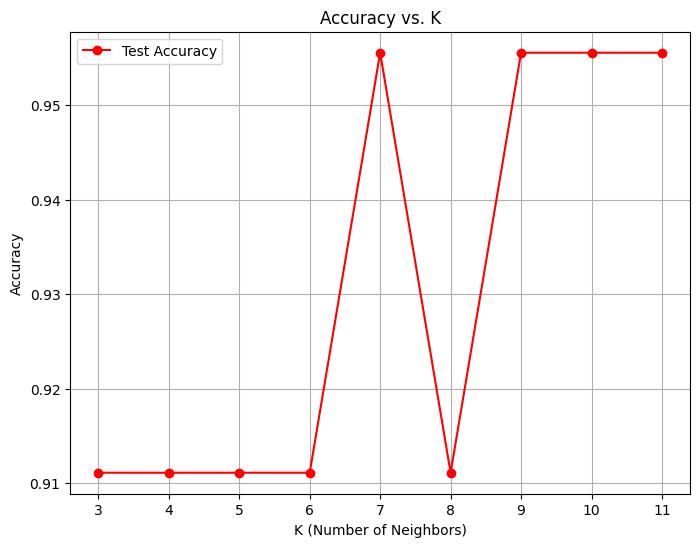

In [269]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(K, test, marker='o', linestyle='-', color='red', label='Test Accuracy')
plt.title('Accuracy vs. K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(K)
plt.legend()
plt.grid(True)
plt.show()

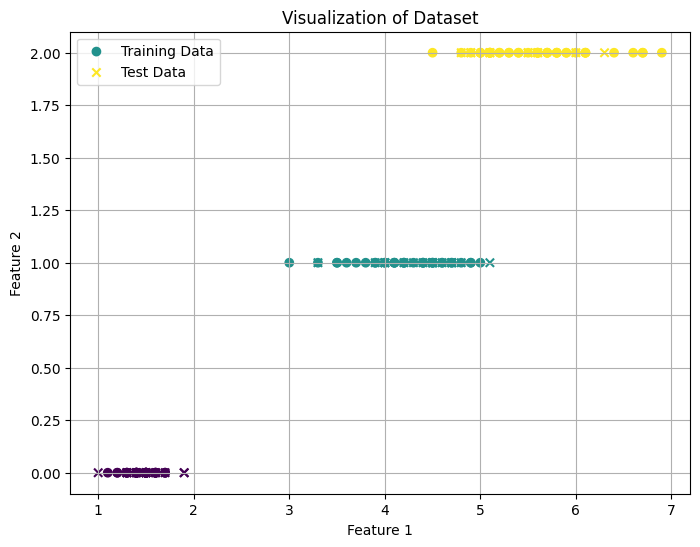

In [276]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, c=y_train, cmap='viridis', label='Training Data')
plt.scatter(X_test,y_test,c=y_test, cmap='viridis', marker='x',label='Test Data')
plt.title('Visualization of Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()